<a href="https://colab.research.google.com/github/amaniayeb/object_recognition_using_CNN/blob/main/Object_recognition_using_a_pre_trained_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install keras tensorflow

#Importing Libraries

In [ ]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Correct imports for loading CIFAR-10 dataset
from keras.datasets import cifar10


In [12]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [13]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


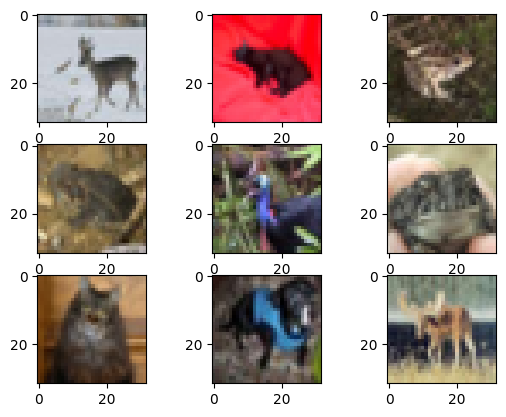

In [14]:
# Display some sample images from the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i+20])
plt.show()

In [16]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 5
np.random.seed(seed)

# normalize the inputs from 0-255 to 0.0-1.0
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train = x_train / 255.0
X_test = x_test / 255.0

In [11]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [17]:
# Hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

#Defining the Model

In [18]:
# Define the allcnn model function, ensuring it matches the architecture used to create the weights file
def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()


    #This function defines the architecture of the All-CNN model.
    #The model consists of several convolutional layers followed by max-pooling layers.
    #The final layers are fully connected and produce a 10-class softmax output.
    # add model layers - Convolution2D, Activation, Dropout

    model.add(Conv2D(96, (3, 3), padding='same', input_shape=(32,32,3)))  # Adjust input shape if needed
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding='same', strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding='same', strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    # load the weights
    if weights:
        model.load_weights(weights)

    # return model
    return model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Setting Hyperparameters and Compiling the Model


In [19]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#Loading Weights and Evaluating the Model
# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)
# Use the legacy optimizer
sgd = tf.keras.optimizers.legacy.SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
# Or use the new API with updated argument
# sgd = SGD(learning_rate=learning_rate, weight_decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 96)        2688      
                                                                 
 activation_14 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_15 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 192)      

In [20]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[200:209]
labels = np.argmax(Y_test[200:209],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 1s/step


In [21]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

0.99999994
0.99999994
0.99999994
1.0
0.99999994
0.99999994
0.99999994
0.99999994
1.0


In [22]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[5 1 8 7 1 3 0 5 7]


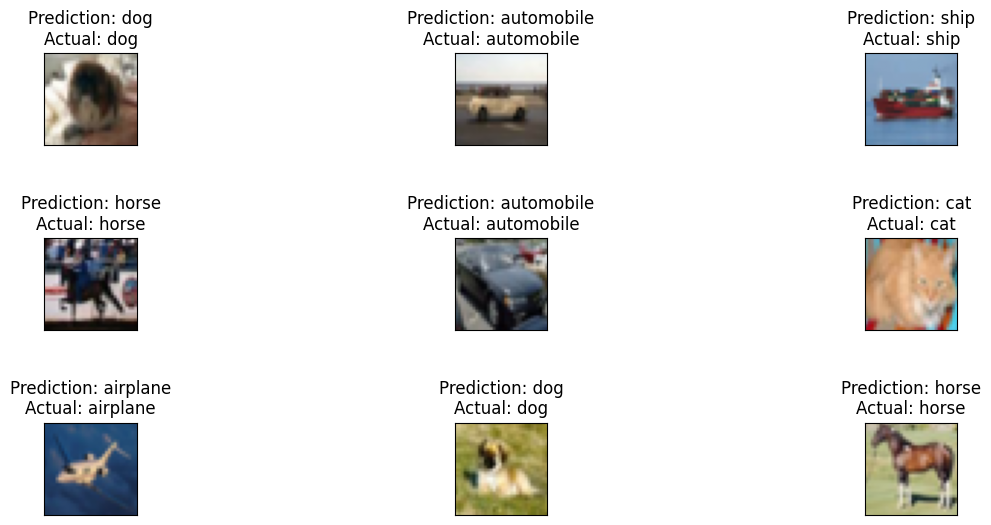

In [23]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()